# Download dataset

https://drive.google.com/file/d/1pBE2IhHSrEyos0okfg3U8v0XSu9pz9AF/view?usp=share_link

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Dense,Conv2D,MaxPooling2D,Dropout,Activation
from tensorflow.keras import backend as bk
from tqdm import tqdm
import cv2
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad,Adamax
from tensorflow.keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from PIL import Image

# Load Dataset

In [2]:
class_name=["cats","dogs"]
label_name={class_name: i for i, class_name in enumerate(class_name)}

print(len(label_name))

2


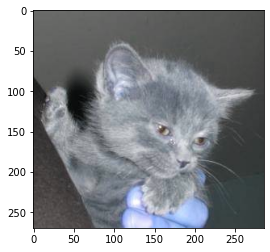

In [7]:
image_path=cv2.imread("dataset/training_set/cats/cat.28.jpg")
plt.imshow(image_path)
plt.show()

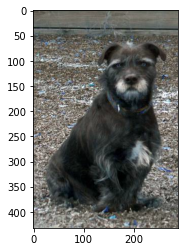

In [6]:
image_path=cv2.imread("dataset/training_set/dogs/dog.28.jpg")
plt.imshow(image_path)
plt.show()

In [8]:
image_shape=(128,128)

In [9]:
def data_set_load():
    
    data_path=["dataset/training_set/","dataset/test_set/"]

    image_data_output=[]
    for i in data_path:
        image_data=[]
        label_data=[]
        print("Counting:{}".format(i))
        
        for j in os.listdir(i):
            label=label_name[j]
            for image_data_file in tqdm(os.listdir(os.path.join(i,j))):
                image_path=os.path.join(os.path.join(i,j),image_data_file)
                image=cv2.imread(image_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,image_shape)
                image_data.append(image)
                label_data.append(label)
                
        image_data=np.array(image_data,dtype="float32")
        label_data=np.array(label_data,dtype="float32")
        image_data_output.append((image_data,label_data))
        
    return image_data_output

In [10]:
data_set_load()

Counting:dataset/training_set/


 69%|████████████████████████████████████████████████████                         | 2707/4000 [00:08<00:02, 495.28it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10111 characters

In [11]:
# (train_image,train_label),(test_image,test_label)=shuffle(data_set_load())

(X_train,Y_train),(X_test,Y_test)=data_set_load()

Counting:dataset/training_set/


 19%|█████████████▊                                                                | 706/4000 [00:01<00:06, 527.17it/s]

limit_output extension: Maximum message size of 10000 exceeded with 10112 characters

In [12]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=42)

In [13]:
train_image=X_train/255.0

In [14]:
test_image=X_test/255.0

In [15]:
len(np.unique(train_image[0]))

235

In [16]:
len(np.unique(test_image[0]))

256

In [17]:
_,train_image_label_info=np.unique(Y_train,return_counts=True)
_,test_image_label_info=np.unique(Y_test,return_counts=True)

In [18]:
print("Train image label information for 0 class  :",train_image_label_info[0])
print("Train image label information for 1 class  :",train_image_label_info[1])

Train image label information for 0 class  : 4000
Train image label information for 1 class  : 4000


In [19]:
print("Test image label information for 0 class  :",test_image_label_info[0])
print("Test image label information for 1 class  :",test_image_label_info[1])

Test image label information for 0 class  : 1000
Test image label information for 1 class  : 1000


# Visualize Random Cats & Dogs Images


In [24]:
def RandomImage_visualization(class_names,imagedata_path,imagedata_label):
    fig=plt.figure(figsize=(10,10))
    fig.suptitle("Cats and Dogs Images Visualization\n",color="black",fontsize=20)
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.imshow(imagedata_path[i],cmap=plt.cm.BrBG)
        plt.xlabel("Class Names: {}".format(class_names[int(imagedata_label[i])]))
    plt.show()
        



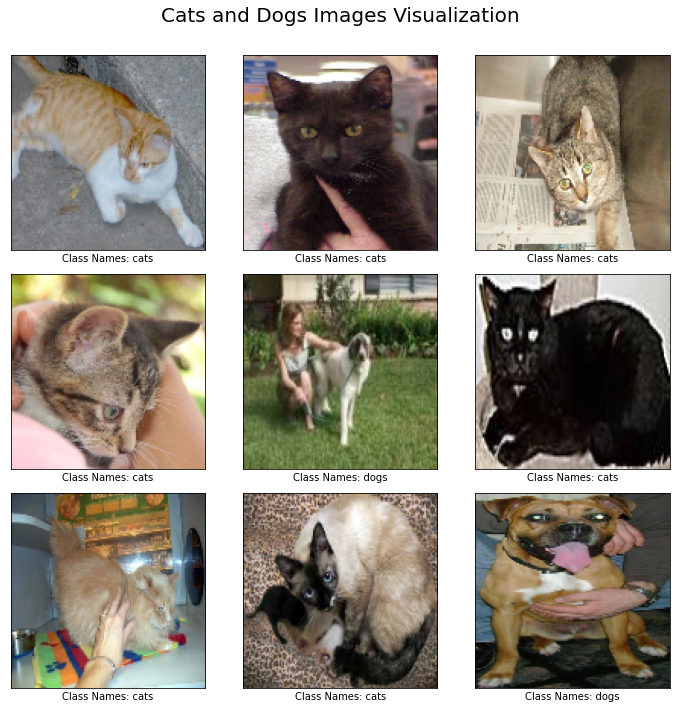

In [25]:
RandomImage_visualization(class_name,train_image,Y_train)

# Create CNN Model

In [26]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [27]:
model.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])

In [33]:
history=model.fit(train_image,Y_train,validation_data=(test_image,Y_test),batch_size=42,epochs=60,steps_per_epoch=2)

Epoch 1/60
2/2 [==============================] - 5s 5s/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6810 - val_accuracy: 0.5680
Epoch 2/60
2/2 [==============================] - 6s 5s/step - loss: 0.6773 - accuracy: 0.6310 - val_loss: 0.6781 - val_accuracy: 0.5475
Epoch 3/60
2/2 [==============================] - 6s 5s/step - loss: 0.6869 - accuracy: 0.5357 - val_loss: 0.6754 - val_accuracy: 0.5385
Epoch 4/60
2/2 [==============================] - 6s 5s/step - loss: 0.6449 - accuracy: 0.5357 - val_loss: 0.6631 - val_accuracy: 0.6080
Epoch 5/60
2/2 [==============================] - 6s 5s/step - loss: 0.6271 - accuracy: 0.6310 - val_loss: 0.6685 - val_accuracy: 0.5815
Epoch 6/60
2/2 [==============================] - 6s 6s/step - loss: 0.7116 - accuracy: 0.5357 - val_loss: 0.6979 - val_accuracy: 0.5360
Epoch 7/60
2/2 [==============================] - 6s 6s/step - loss: 0.6465 - accuracy: 0.6071 - val_loss: 0.6850 - val_accuracy: 0.5360
Epoch 8/60
2/2 [=========================

limit_output extension: Maximum message size of 10000 exceeded with 10133 characters

In [34]:
score = model.evaluate(X_test, Y_test)

60/63 [===========================>..] - ETA: 0s - loss: 45.1852 - accuracy: 0.626

limit_output extension: Maximum message size of 10000 exceeded with 10104 characters

In [35]:
print('Test accuracy:', score[1]*100,"%")

Test accuracy: 63.24999928474426 %


# Test The Model


1/1 [==============================] - 0s 24ms/step
Our Model Prediction is: dog


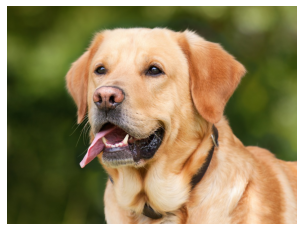

In [36]:
results={0:'cat',1:'dog'}

test_image_path=Image.open("dataset/single_prediction/cat_or_dog_1.jpg")
imge=test_image_path.resize(image_shape)
imge=np.expand_dims(imge,axis=0)
imge=np.array(imge)/255
final_predct=np.argmax(model.predict([imge])[0])


        
print("Our Model Prediction is: "+results[final_predct])
plt.imshow(test_image_path)
plt.axis("off")
plt.show()



1/1 [==============================] - 0s 21ms/step
Our Model Prediction is: cat


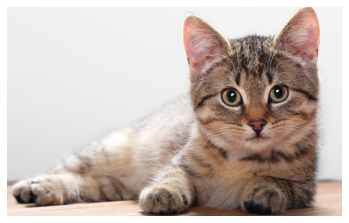

In [37]:
results={0:'cat',1:'dog'}

test_image_path=Image.open("dataset/single_prediction/cat_or_dog_2.jpg")
imge=test_image_path.resize(image_shape)
imge=np.expand_dims(imge,axis=0)
imge=np.array(imge)/255
final_predct=np.argmax(model.predict([imge])[0])


        
print("Our Model Prediction is: "+results[final_predct])
plt.imshow(test_image_path)
plt.axis("off")
plt.show()

